In [1]:
import random 
import pandas as pd
import numpy as np 
from sklearn import metrics
import matplotlib.pyplot as plt
from scipy import ndimage 
from scipy.cluster import hierarchy
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
%matplotlib inline

In [2]:
df = pd.read_csv('Customer.csv')
df_new = df
df_new.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df_new.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [4]:
# checking for NULL data in the dataset
df_new.isnull().any().any()

False

In [5]:
#  Convert Gender to number

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

encode_address = LabelEncoder()

df_new['Gender'] = encode_address.fit_transform(df_new['Gender'])
#df_new['Gender'] = df_new['Gender'].map({'Male': 0, 'Female': 1})

df_new.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [6]:
# drop CustomerID column from the DataFrame

df_new = df_new.drop('CustomerID', axis=1)
df_new.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [7]:
df_new.shape

(200, 4)

In [8]:
from sklearn.preprocessing import StandardScaler

X = df_new.values[:,2:] #,2:
X = np.nan_to_num(X)
X = StandardScaler().fit_transform(X)
X.shape

(200, 2)

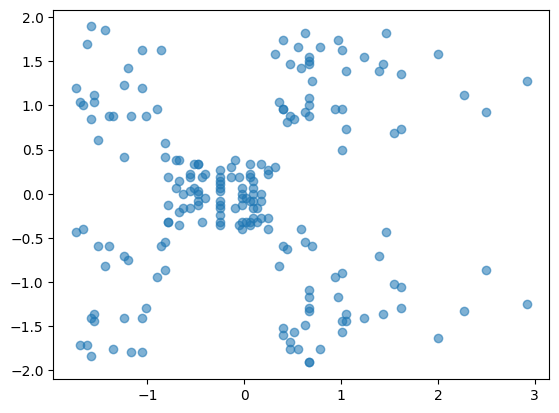

In [9]:
plt.scatter(X[:, 0], X[:, 1], marker='o' , alpha = 0.57) 

# 

# 

# K-means modeling

In [10]:
clusterNum = 5
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 100)
k_means.fit(X) #Clus_dataSet
labels_k = k_means.labels_
#print(labels)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels_k))

Silhouette Coefficient: 0.555


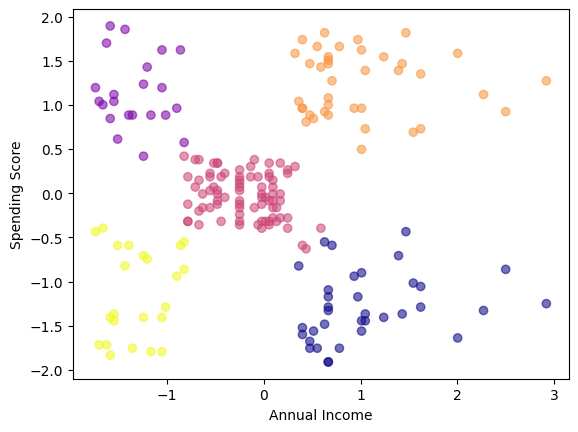

In [14]:
# Plot the clusters
plt.scatter(X[:, 0], X[:,1], c = labels_k, cmap= "plasma" , alpha=0.57) # plotting the clusters
plt.xlabel("Annual Income") # X-axis label
plt.ylabel("Spending Score") # Y-axis label
plt.show() # showing the plot

# 

# 

# DBSCAN modeling

### Calculate  the eps by NearestNeighbors function

In [15]:
# Compute data proximity from each other using Nearest Neighbours
from sklearn.neighbors import NearestNeighbors 

neighb = NearestNeighbors(n_neighbors=4) # creating an object of the NearestNeighbors class with 2*X_dimention n_neighbors
nbrs=neighb.fit(X) # fitting the data to the object
distances,indices=nbrs.kneighbors(X) # finding the nearest neighbours

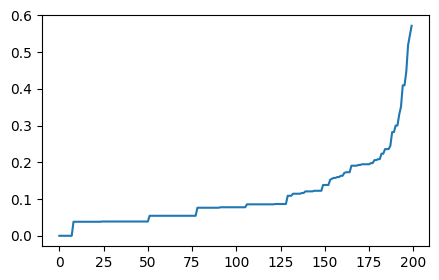

In [16]:
# Sorting and plot the distances between the data points

distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:, 1] # taking the second column of the sorted distances
plt.rcParams['figure.figsize'] = (5,3) # setting the figure size
plt.plot(distances) # plotting the distances
plt.show() # showing the plot

### Fit the model

In [17]:
from sklearn.cluster import DBSCAN 

clustering = DBSCAN(eps = 0.32, min_samples = 4).fit(X) #Min_sample = 2* X_dimention
labels = clustering.labels_

# add the cluster column to the dataframe
#clusters = pd.DataFrame(clustering.fit_predict(X))
#df_new["Cluster"] = clusters
#df_new.head()

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)


print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Estimated number of clusters: 7
Estimated number of noise points: 18
Silhouette Coefficient: 0.415


### Plot the clusters with the third and forth columns of the X

In [18]:
unique_labels = set(labels)
unique_labels

# Create colors for the clusters.
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

In [19]:
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[clustering.core_sample_indices_] = True
#core_samples_mask

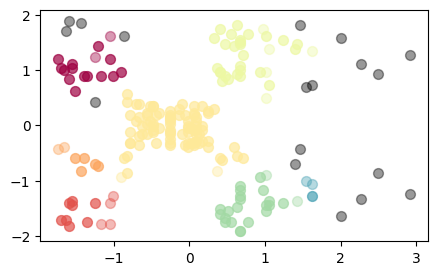

In [30]:
# Plot the points with colors
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    # Plot the datapoints that are clustered
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.7)

    # Plot the outliers
    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.4)

# 

# 

# Hierarchical modelling

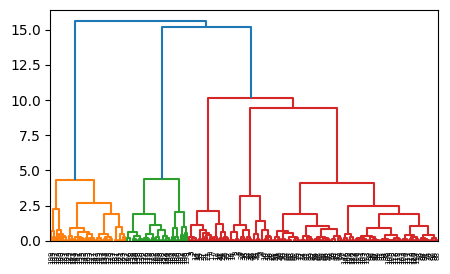

In [31]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

In [32]:
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
model.fit(X)
labels_h = model.labels_

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels_h))

Silhouette Coefficient: 0.554


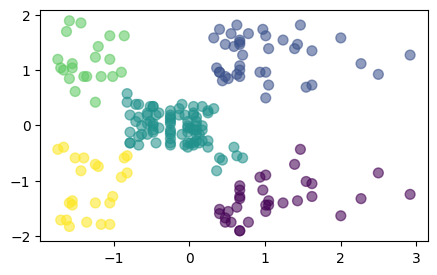

In [33]:
plt.scatter(X[:,0], X[:,1 ], s=50, marker='o', c=labels_h ,alpha=0.57)

plt.show()

# 

# 

# :گزارش پروژه
پس از خواندن فایل ، بررسی کردم که هیچ ستونی داده پرت نداشته باشه و بعد مقادیر ستون دیتافریم رو داخل آرایه ایکس ریختم و این آرایه رو نرمالایز کردم، بعد داده های آرایه ایکس رو با اسکتر پلات رسم کردم که یه دید کلی نسبت به تمام دیتاهام و نحوه پراکندگی شون داشته باشم. با نگاه کردن به نمودار، از نظر من بهترین تعداد خوشه هایی که میشه برای این دیتاست رسم کرد، تعداد 5 خوشه ست، برای همین در ادامه برای الگوریتم های کا_مینز و هایرارکیکال همین عدد رو بعنوان تعداد خوشه به الگوریتم بعنوان ورودی میدم.(البته برای اینکه میزان دقت مدلم رو بسنجم از تعداد خوشه های متفاوتی در اجرای هر دو الگوریتم استفاده کردم که مقدار سیلهوت_کوافیشنت پایین تری داشتند و اینجا بود که نسبت به انتخاب عدد تعداد خوشه هام یعنی عدد 5 مطمئن شدم و البته کار دیگری که انجام دادم این بود که دندوگرام آرایه ایکس رو با روش "وارد" رسم کردم و از این نمودار هم فهمیدم که بهترین تعداد خوشه برای دیتاهای من همون عدد 5 هست) در ادامه الگوریتم دی_بی_اسکن رو روی دیتاهام فیت کردم و برای پیدا کردن کمترین مقدار همسایه ها، از این روش رفتم که این عدد رو برابر با 2برابر دایمنشن آرایه ایکس در نظر بگیرم طبق مقالاتی که تو این حوزه خوندم و بعد با این عدد میزان اپسیلون بهینه رو پیدا کردم به این صورت که سعی کردم با پلات کردن نمودار سورت نزدیکی هر نقطه از هم به نمودار البو برسم و از روی اون ، جایی که البو صورت گرفته رو تخمین بزنم و بعنوان اپسیلون توی الگوریتمم ازش استفاده کنم. در ادامه نمودار خوشه بندی برای هر مدل رو رسم کردم و برای مدل دی_بی_اسکن، میزان خوشه ها برابر با 7 تا شد و میزان 18 داده هم نویز بودن که در هیچ دسته ای قرار نگرفتن و توی نمودارش هم نویزهارو با رنگ خاکستری تیره مشخص کردم. در ادامه میزان دقت به ترتیب در الگوریتم کا_مینز از همه بهتر و با تفاوتی خیییلی ناچیزی با الگوریتم هایرارکیکال بود و بعد هم الگوریتم دی_بی_اسکن   